# Power Analysis

Power analysis is a way to systematically approach the relationship between significance level, sample size, statistical power, and effect size when hyopthesis testing.

Power analysis lets us answer questions like:

- How much statistical power does a study have?
- How big of a sample size do I need?

Before we get into power analysis, we will explain effect size, then walk through an example power analysis and visualize the results.

## Effect Size

Effect size is a way to measure how strong an effect is, which is something that a p-value doesn't directly reflect. For example, a correlation coefficient of .01 could be extremely statistically significant with a large enough sample size, but still is very small in terms of effect size.

Assuming the measure of interest is the same, as the sample size increases, the p-value will decrease, but the effect size will stay the same. A low p-value says that there is an association; a low effect says says that even though there is an association, the magnitude of that association is not very high.

A good measure of effect size should be unitless so that it can be compared across different studies or experiments. For example, if one study concludes that left-handed people tend to be 3 inches taller than right-handed people, and another study concludes that people that drink coffee tend to live 3 years longer than people who don't, we can't compare the effect sizes of the two studies because we can't compare 3 inches to 3 years. A measure of effect size allows us to standardize the magnitude of the effect we are studying.

There are somewhere between [50 and 100 different measures for effect size](https://en.wikipedia.org/wiki/Effect_size#Types), and each type of hypothesis test that we have covered has it's own way to measure effect size. We will focus on the following measures:

- Pearson's r for correlation tests
- Cohen's d for t-tests
- Cohen's $w$ for $\chi^2$ tests

### Pearson's R

This one will be the most familiar because we have already used it. Note that pearson's r is unitless, this means that the correlation between several different variables can be compared, even if the units of the different variables are all different.

!!!warn "Test Statistic vs Effect Size"
    While in the case of Pearson's r, the test statistic is also a measure of effect size, this is not always the case.

    
### Cohen's d

Cohen's d is given by:

$$ d = \frac{\bar{x_1} - \bar{x_2}}{s_p} $$

where $s_p$ is the pooled standard deviation, and is given by:

$$ s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}} $$

Note that this calculation is very similar to the t-statistic for a two-sample t-test, but isn't influenced as much by the sample size of the two groups.

The following table (adapted from [the wikipedia article on cohen's d](https://en.wikipedia.org/wiki/Effect_size#Types)) shows how to interpret cohen's d values:

| $d$ | Effect Size |
| --- | ----------- |
| .01 | very small  |
| .2  | small       |
| .5  | medium      |
| .8  | large       |
| 1.2 | very large  |
| 2   | huge        |

### Cohen's $w$

$$ w = \sqrt{\sum_{i=1}^n{\frac{(p_{0i} - p_{1i})^2}{p_{0i}}}} $$

Where $p_{0i}$ is the $i$th expected proportion, and $p_{1i}$ is the $i$th observed proportion.

## Performing Power Analysis

Given the following 4 parameters

- Significance Level ($\alpha$ = P(Type I Error) = P(False Positive))
- Statistical Power ($1 - \beta$, where $beta$ = P(Type II Error) = P(False Negative))
- Effect Size
- Sample Size

We can calculate any of these if we know the other 3.

---

Let's walk through an example of a power analysis. Suppose we know the following values:

- Significance Level:  $\alpha =  0.05$
- Power Level: $\beta = 0.20$ => Power level of 0.80.
- Effect size: Cohen's d = 0.8

And we want to know the sample size.

We will use the `statsmodels` package for power analysis. The `statsmodels.stats.power` module implements power and sample size calculations for the t-tests and chi-square tests.

To solve for any one of the parameters of the power equations for a t-test, we can use:

- `tt_solve_power` for one sample t-test
- `tt_ind_solve_power` for 2 sample t-test[^1]

[^1]: For the two sample t-test, the number of observations refers to the number of observations in group 1. The number of observations in group two is assumed to be the same by default, but this can be changed with the `ratio` key word argument. See the docstring for `tt_ind_solve_power` for more details.

In [1]:
import numpy as np
from statsmodels.stats.power import tt_ind_solve_power

tt_ind_solve_power(effect_size=.8,
                   alpha=.05,
                   power=.8)

25.52457250047935

Here we provided values for the effect size, alpha, and power, and the value returned is the sample size needed to align with the values we supplied.

Let's look at another example. We will provide the effect size, alpha, and number of observations in order to calculate our power.

In [2]:
tt_ind_solve_power(effect_size=.8,
                   nobs1=50,
                   alpha=.01)

0.9124650000002933

This tells us that if we ran a study with 50 observations in each group, set a 99% confidence level, and observed an effect size of .8, our power (i.e. P(rejecting $H_0$)|$H_0$ is false) is about .9.

In [3]:
nobs = tt_ind_solve_power(effect_size=.8,
                          alpha=.05,
                          power=.8)

nobs

25.52457250047935

Statsmodels also provides a class, `TTestIndPower` (and similiar classes for other tests), that we can use to visualize our power analysis:

Text(0, 0.5, 'Power')

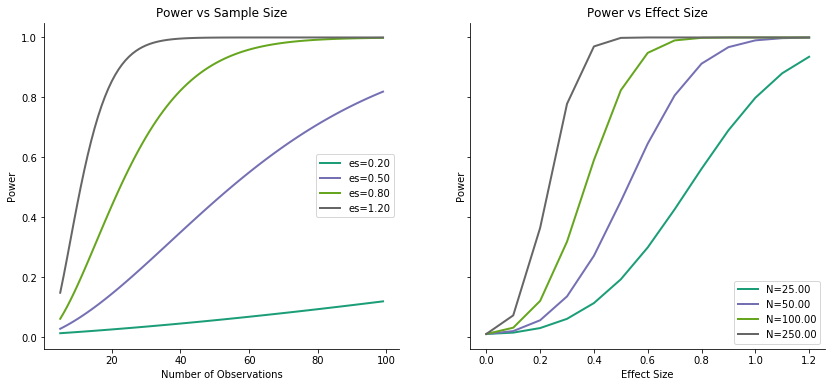

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rc("axes.spines", top=False, right=False)

from statsmodels.stats.power import TTestIndPower

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

analysis = TTestIndPower()

analysis.plot_power(dep_var='nobs',
                    nobs=np.arange(5, 100),
                    effect_size=np.array([.2, .5, .8, 1.2]),
                    alpha=.01,
                    ax=ax1)
ax1.set_ylabel('Power')
ax1.set_title('Power vs Sample Size')
ax1.legend(loc='best')

analysis.plot_power(dep_var='effect_size',
                    nobs=np.array([25, 50, 100, 250]),
                    effect_size=np.arange(0, 1.3, .1),
                    alpha=.01,
                    ax=ax2)
ax2.set_title('Power vs Effect Size')
ax2.set_ylabel('Power')

These visualizations show us how the power increases as the number of observations and effect size increases.

## Further Reading

- [Power Analysis in Python](https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/)
- [Power and Sample Size Calculator](http://powerandsamplesize.com/)

## Exercise

Calculate the power relating to all the hypothesis tests you performed in this module.